# This R notebook implements a Environmentaly Extended Input-output method

In [271]:
require(gdata) #for reading xlsx
library(matlib) #for matrix operations
library(ggplot2)
library(cowplot)

The method is based on the following equation:
<br>
\begin{equation*}
CF  = e . (I - A)^{-1} x Y
\end{equation*}
<br>
where
<br>
<br>
e = vector of emissions coefficients
<br>
I = Identity Matrix
<br>
A = Coefficient Matrix
<br>
Y = Is the Final Demand Matrix

## Preparing the data

#### import data

In [107]:
#iot = read.xls("/home/jm/Documents/PhD_EPFL/Thesis/papers/step1/urban_lca/swiss_household/data/EEIO/siot.xlsx", sheet = 'siot', header = TRUE)

iot = read.csv("/home/jm/Documents/PhD_EPFL/Thesis/papers/step1/urban_lca/swiss_household/data/EEIO/iot.csv",row.names = 1, header = TRUE)

In [125]:
head(iot, 10)

,code_01,code_02,code_05,code_10_14,code_15_16,code_17,code_18,code_19,code_20,code_21,⋯,code_73,code_75a,code_75b,code_80,code_85,code_90a,code_90b,code_90c,code_91_92,code_93_95
code_01,2477.460337,3.85392906,0.01602814,0.0000000,10057.821905,62.9035638,0.4989335,4.611849e+00,6.197472e+00,0.07694405,⋯,0.70660120,0.92588048,68.3710948,47.0516862,1.116317e+02,2.326836e-01,1.338616e-01,4.277806e+01,42.690505,1.6647908
code_02,79.391954,446.92740117,0.00000000,7.6989437,9.027296,0.0000000,0.0000000,0.000000e+00,8.482896e+01,186.04680073,⋯,0.06596957,0.05750416,36.5847675,1.8202127,6.240106e-01,0.000000e+00,0.000000e+00,2.869183e-17,0.000000,0.4923350
code_05,0.000000,0.00000000,0.64018855,0.0000000,16.361987,0.0000000,0.0000000,0.000000e+00,9.374471e-04,0.00000000,⋯,0.03912650,0.00000000,0.3140933,0.0000000,4.147653e+00,6.575554e-05,3.782422e-05,1.805288e-18,1.835305,0.0000000
code_10_14,7.849766,0.10191303,0.02042733,18.7566769,8.408830,5.4778356,0.3726678,1.249832e-04,7.952613e-01,28.35947797,⋯,1.83982004,178.53469814,0.0000000,8.8332695,2.518775e+01,0.000000e+00,0.000000e+00,3.090819e+00,15.109838,0.7454036
code_15_16,1065.453275,0.36568774,1.21148560,0.0000000,6181.630622,0.0000000,0.0000000,1.943103e+01,1.106481e+00,22.18321231,⋯,5.58044911,0.23742096,142.0509477,367.4929365,1.251664e+03,4.267224e-02,2.454669e-02,1.672129e+00,109.746329,0.1061232
code_17,10.871143,0.06791592,0.02631219,0.0000000,47.836351,561.0192913,416.4783613,2.624340e+01,2.906087e+00,14.28560091,⋯,5.92263163,7.07898311,1.0553589,86.8185642,1.055449e+02,1.361878e-02,7.833874e-03,5.440542e-01,11.647193,5.8003766
code_18,16.745101,0.12432720,0.02632565,0.9439852,3.610019,0.5855857,211.2925367,0.000000e+00,5.202150e-02,1.12609448,⋯,6.37897562,28.64256123,0.0000000,13.9780018,2.185665e+01,2.170430e-03,1.248287e-03,2.119646e-01,47.784658,0.8097245
code_19,2.898912,0.01876482,0.00000000,2.3610857,9.629609,0.1815039,1.5929187,1.265019e+02,1.010626e+00,0.86613239,⋯,0.01827368,0.01249953,11.1342320,0.9768781,3.905369e-02,2.411788e-04,1.387206e-04,1.005079e+00,9.658147,0.0000000
code_20,31.642386,4.80098451,0.07276375,3.2242923,123.221028,1.5740924,0.7509592,5.267605e-01,3.279778e+03,401.81124730,⋯,3.89512949,77.92733349,0.0000000,35.7446680,2.940759e+01,0.000000e+00,0.000000e+00,2.936095e+01,24.972864,27.9341718
code_21,11.672108,0.13868924,0.02169995,35.4350263,448.671038,25.0858798,10.1691426,6.006622e+00,3.974740e+01,982.70132418,⋯,148.59160711,1.70503805,42.9148609,40.3202905,4.821727e+01,5.015778e-01,3.157112e-01,6.341189e+00,48.596817,11.1851807


In [39]:
namea = read.xls("/home/jm/Documents/PhD_EPFL/Thesis/papers/step1/urban_lca/swiss_household/data/EEIO/NAMEA_air.xlsx", sheet = 'Emissions_2008', header = TRUE)

Warning message:
“running command ''/usr/bin/perl' '/home/jm/R/x86_64-pc-linux-gnu-library/3.4/gdata/perl/xls2csv.pl'  '/home/jm/Documents/PhD_EPFL/Thesis/papers/step1/urban_lca/swiss_household/data/EEIO/NAMEA_air.xlsx' '/tmp/RtmpsndDXb/file47df3384b0db.csv' 'Emissions_2008'' had status 2”

ERROR: Error in xls2sep(xls, sheet, verbose = verbose, ..., method = method, : Intermediate file '/tmp/RtmpsndDXb/file47df3384b0db.csv' missing!


ERROR: Error in file.exists(tfn): invalid 'file' argument


#### e

e is calculated by dividing the vector[total output] by the vector[total emission] for each activity

vector[total output] comes from the IOT table. We need to define if it's better to use "Output at basic prices" or "Supply at basic prices"

In [240]:
emission_factor = read.csv("/home/jm/Documents/PhD_EPFL/Thesis/papers/step1/urban_lca/swiss_household/data/EEIO/emission_factors.csv",row.names = 1, header = TRUE)

#### A

A is calculated from the IO table, but it needs tp be normalized, calculating the transfer coefficients

In [ ]:
iot = read.csv("/home/jm/Documents/PhD_EPFL/Thesis/papers/step1/urban_lca/swiss_household/data/EEIO/iot.csv",row.names = 1, header = TRUE)

In [225]:
iot_tc <- iot
total_imput <- colSums(iot_tc)

for (activity in names(total_imput)){
  for (row in 1:nrow(iot_tc)){
     
      if (total_imput[row] != 0){
      
      iot_tc[row,activity] <- iot_tc[row,activity] / total_imput[row]
    
      } else {
         
          iot_tc[row,activity] <- 0
          
      }
 
}}

#iot_tc <- na.omit(iot_tc) #check where are the NAs


#### Y

Y can be a final demand matrix or a final demand vector

In [141]:
final_demand = read.csv("/home/jm/Documents/PhD_EPFL/Thesis/papers/step1/urban_lca/swiss_household/data/EEIO/final_demand.csv",row.names = 1, header = TRUE)

In [142]:
head(final_demand)

,COICOP.01,COICOP.02,COICOP.03,COICOP.04,COICOP.05,COICOP.06,COICOP.07,COICOP.08,COICOP.09,COICOP.10,COICOP.11,COICOP.12
01,3743.43927,0.000,0.0000,118.5029187,42.7984,0,0,0,298.1423,0,0,0
02,0.00000,0.000,0.0000,106.8744198,0.0000,0,0,0,0.0000,0,0,0
05,111.96571,0.000,0.0000,0.0000000,0.0000,0,0,0,0.0000,0,0,0
10-14,26.50658,0.000,0.0000,0.3442643,0.0000,0,0,0,188.2729,0,0,0
15-16,16689.44892,4143.319,0.0000,0.0000000,0.0000,0,0,0,405.2686,0,0,0
17,0.00000,0.000,106.6438,0.0000000,964.0370,0,0,0,135.3764,0,0,0


## Calculation

In [247]:
A <- data.matrix(iot_tc, rownames.force = NA)
I <- diag(nrow(iot_tc))

Y <- data.matrix(final_demand, rownames.force = NA)
e <- emission_factor$emission_factor

In [255]:
cf = e %*% inv(I - A) %*% Y # solve( also calculates the inverse)

cf

COICOP.01,COICOP.02,COICOP.03,COICOP.04,COICOP.05,COICOP.06,COICOP.07,COICOP.08,COICOP.09,COICOP.10,COICOP.11,COICOP.12
313377629,79057313,62552826,511318156,82306963,316284833,54362438,39489546,111431181,3183622,96408238,281843543


#### plot results

In [261]:
df_cf = data.frame(id = 1:nrow(cf), index = rep(1:ncol(cf), each = nrow(cf)), value = as.vector(cf))
df_cf

id,index,value
1,1,313377629
1,2,79057313
1,3,62552826
1,4,511318156
1,5,82306963
1,6,316284833
1,7,54362438
1,8,39489546
1,9,111431181
1,10,3183622


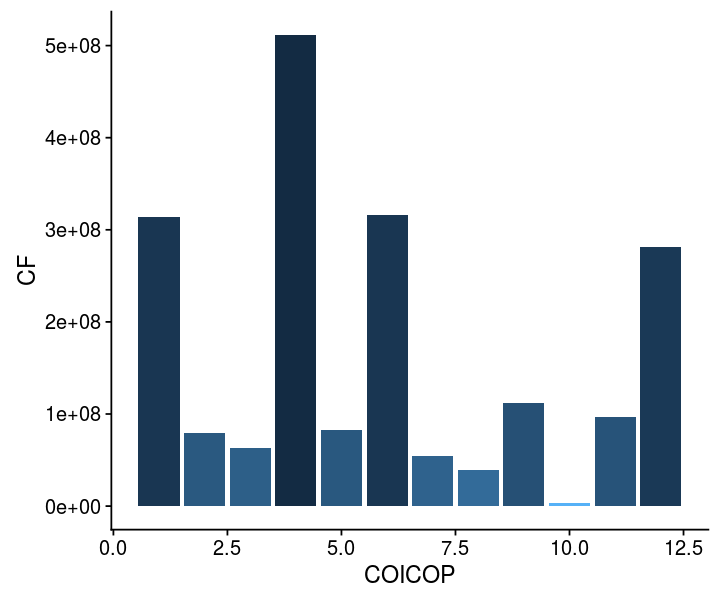

In [277]:
options(repr.plot.width=6, repr.plot.height=5)

ggplot(data=df_cf, aes(x=index, y=value, fill=log(1/value))) + geom_bar(stat="identity") +
    ylab('CF') + xlab('COICOP')+ guides(fill=FALSE)